# 根据fake_tweets产生的数据文件进行分析

In [1]:
from my_weapon import *
from collections import defaultdict, Counter

In [2]:
from IPython.display import display

In [3]:
url_tweets = json.load(open("data/fake-url-tweets.json"))

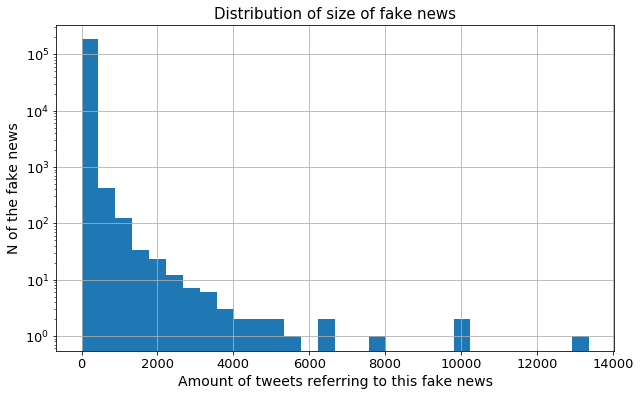

In [3]:
# x, cdf, pdf = get_cdf_pdf(data, 0, 15000, 100)
plt.figure(figsize=(10, 6))
data = pd.Series([len(url_tweet["tweets"]) for url_tweet in url_tweets])
data.hist(bins=30)
plt.title('Distribution of size of fake news', fontsize=15)
plt.ylabel('N of the fake news', fontsize=14)
plt.xlabel('Amount of tweets referring to this fake news', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.yscale("log")
plt.savefig('fig/distribution_size_fake_news.pdf', dpi=300)
plt.show()
plt.close()

In [4]:
url_tweets[88888]

{'url': 'http://thepoliticalinsider.com/secret-service',
 'tweets': [{'tweet_id': '771072785854570496',
   'user_id': '32144891',
   'dt': '2016-08-31 14:50:52',
   'is_first': 1,
   'is_source': 1,
   'is_IRA': 0,
   'URL': 'http://thepoliticalinsider.com/secret-service',
   'hostname': 'thepoliticalinsider.com'},
  {'tweet_id': '771073146879291392',
   'user_id': '533402213',
   'dt': '2016-08-31 14:52:18',
   'is_first': 0,
   'is_source': 0,
   'is_IRA': 0,
   'URL': 'http://thepoliticalinsider.com/secret-service',
   'hostname': 'thepoliticalinsider.com'}]}

- 189620条谣言URL, 914272条初始推特；
- 25212个第一条谣言的用户, 88215个发初始推特的用户；

### 专门针对用户的分析，放到analyze_users.ipy中～

In [5]:
import pendulum


def get_day(dt):
    return pendulum.parse(dt).format("YYYY-MM-DD 00:00:00")
    
    
def get_hour(dt):
    return pendulum.parse(dt).format("YYYY-MM-DD HH:00:00")
    

def cal_ts_day(dts):
    start = get_day(dts[0])
    end = get_day(dts[-1])
    rng = pd.date_range(start, end, freq='D')
    ts = pd.Series(0, rng)
    for dt in dts:
        now = get_day(dt)
        ts[now] += 1
    return ts


def cal_ts_48hours(dts):
    start = get_hour(dts[0])
    rng = pd.date_range(start, periods=48, freq="H")
    ts = pd.Series(0, rng)
    for dt in dts:
        now = get_hour(dt)
        if now in ts:
            ts[now] += 1
    return ts
    
    
def plot_day(i, url, sorted_dts, sorted_dts2=None, save=False):
    """
    包含了两条线！
    """

    plt.figure(figsize=(10, 6))
    ts = cal_ts_day(sorted_dts)
    ts.plot()
    
    if sorted_dts2:
        ts2 = cal_ts_day(sorted_dts2)
        ts2.plot()
    
    # configure
    plt.ylabel('N of tweets with this fake news', fontsize=15)
    plt.xticks(fontsize=11); plt.yticks(fontsize=11)
#     plt.xlabel('$Date$', fontsize=15)
#     plt.title(url)
    
    if save:
        plt.savefig('fig/{}-{}-overall-spread.pdf'.format(i, url), dpi=300)
    else:
        plt.show()
    
    plt.close()


def plot_48hours(i, url, sorted_dts, sorted_dts2=None, save=False):
    """
    包含了两条线！
    """
    
#     print(url)
#     print("实际传播开始和结束时间：", sorted_dts[0], sorted_dts[-1])

    plt.figure(figsize=(10, 6))
    ts = cal_ts_48hours(sorted_dts)
    ts.plot()
    
    if sorted_dts2:
        ts2 = cal_ts_48hours(sorted_dts2)
        ts2.plot()

    
    # configure
    plt.ylabel('N of tweets with this fake news', fontsize=15)
    plt.xticks(fontsize=11); plt.yticks(fontsize=11)
#     plt.xlabel('$Date$', fontsize=15)
#     plt.title(url)

    if save:
        plt.savefig('fig/{}-{}-first-48-hours.pdf'.format(i, url), dpi=300)
    else:
        plt.show()
        
    plt.close()


plot 1 ~


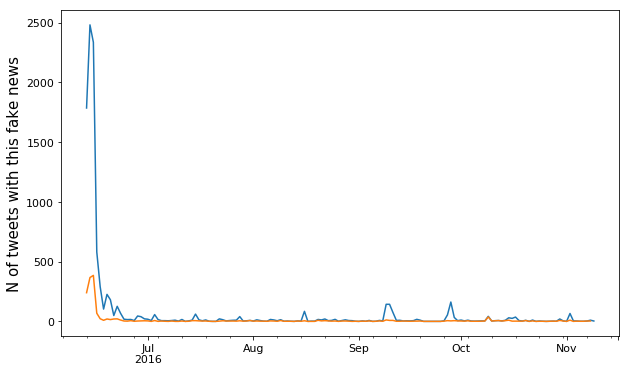

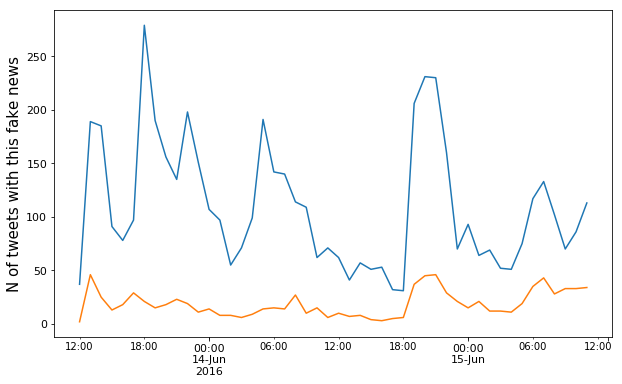

plot 2 ~


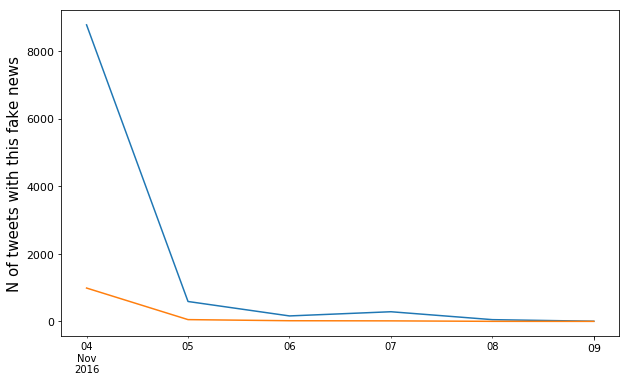

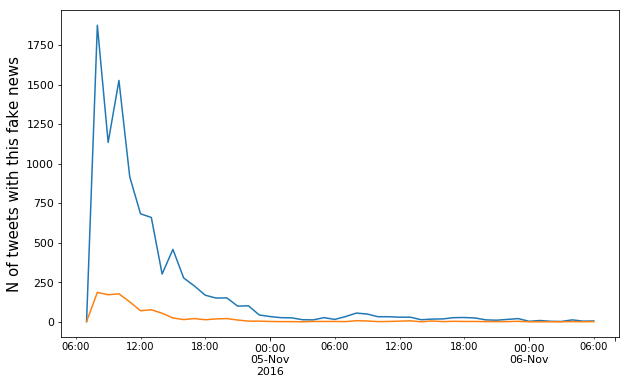

In [6]:
for i, url_tweet in enumerate(url_tweets):

    if i == 0:
        continue
    if i >= 3:
        break
    print("plot {} ~".format(i))
    
    url = url_tweet["url"]
    tweets_list = url_tweet["tweets"]
    dts = [t["dt"] for t in tweets_list]
    
    dts2 = [t["dt"] for t in tweets_list if t["is_source"]==1]
    plot_day(i, url, dts, dts2)
    plot_48hours(i, url, dts, dts2)

#     plot_day(i, url, dts)
#     plot_48hours(i, url, dts)

---

## source对trump和hillary的态度

In [3]:
from SQLite_handler import opinion

first_opinion = []
staters_opinion = []
other_opinion = []

tweets_csv = pd.read_csv("data/fake-tweets.csv", usecols=["tweet_id", "is_first", "is_source"])


for i, row in tqdm(tweets_csv.iterrows()):
    tid = row["tweet_id"]
    opi = opinion(tid)
    if row["is_first"] == 1:
        first_opinion.append(opi)
    if row["is_source"] == 1:
        staters_opinion.append(opi)
    else:
        other_opinion.append(opi)
    

2562218it [10:21, 4120.16it/s]


Counter({1: 145411, 0: 43464, -1: 587})
Counter({1: 713400, 0: 181059, -1: 2585})
Counter({1: 1488826, 0: 175888, -1: 460})


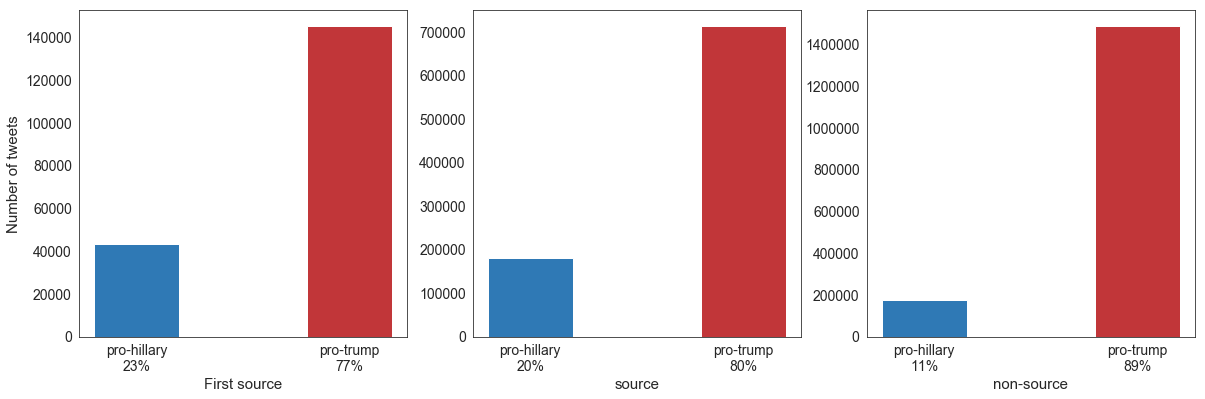

In [29]:
from collections import Counter
sns.set_style("white")
sns.color_palette("RdBu", n_colors=7)

count = Counter(first_opinion)
print(count)

label = ["pro-hillary", "pro-trump"]
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('First source', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(staters_opinion)
print(count)

plt.subplot(132)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('source', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

count = Counter(other_opinion)
print(count)

plt.subplot(133)
plt.bar(1, count[0], color=sns.color_palette("RdBu")[5], width=0.2)
plt.bar(1.5, count[1], color=sns.color_palette("RdBu")[0], width=0.2)
label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 1.5], label)
plt.xlabel('non-source', fontsize=15)
# plt.ylabel('N of fake sources', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)

plt.savefig("fig/support.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [9]:
uids_of_IRA = set(json.load(open("data/IRA_map.json")).values())

## 下面对fake-tweets.csv分析

In [59]:
from datetime import datetime

tweets_csv = pd.read_csv("data/fake-tweets.csv", dtype=str)
tweets_csv = tweets_csv.astype({"is_IRA": int, "is_first": int, "is_source": int, "dt": datetime})
tweets_csv

,URL,dt,hostname,is_IRA,is_first,is_source,tweet_id,user_id
0,http://infowars.com/show,2016-04-29 10:51:25,infowars.com,0,1,1,726076431411761152,733838438
1,http://infowars.com/show,2016-05-24 12:42:06,infowars.com,0,0,1,735163983376719872,109065990
2,http://infowars.com/show,2016-05-26 19:02:31,infowars.com,0,0,1,735984491114565633,14505245
3,http://infowars.com/show,2016-05-27 11:35:43,infowars.com,0,0,1,736234437550080000,109065990
4,http://infowars.com/show,2016-06-01 16:20:17,infowars.com,0,0,0,738117991074660356,352537680
5,http://infowars.com/show,2016-06-01 17:09:51,infowars.com,0,0,0,738130465551355904,705518452035997698
6,http://infowars.com/show,2016-06-02 11:07:02,infowars.com,0,0,1,738401546002538496,109065990
7,http://infowars.com/show,2016-06-02 11:07:23,infowars.com,0,0,0,738401637371420673,4921258114
8,http://infowars.com/show,2016-06-02 11:07:28,infowars.com,0,0,0,738401658271588352,2426872238
9,http://infowars.com/show,2016-06-02 11:07:31,infowars.com,0,0,0,738401671361990657,725448266867970049


In [62]:
len(tweets_csv["tweet_id"].unique())

2492013

## tweets_csv有多少url，多少is_source，多少is_first

In [8]:
len(tweets_csv["URL"].unique()), len(tweets_csv["user_id"].unique())

(184297, 208367)

## * 基于用户的转发网络构建

In [26]:
retweet_network = json.load(open("data/fake_retweet_network.json"))

In [20]:
def save_network():
    G = nx.DiGraph()

    nodes = tweets_csv["user_id"].tolist()
    edges = []
    dict_tweetid_userid = {}
    for _, row in tweets_csv.iterrows():
        dict_tweetid_userid[row["tweet_id"]] = row["user_id"]
    
    for n2, n1 in retweet_network.items():
        u1 = dict_tweetid_userid[n1]
        u2 = dict_tweetid_userid[n2]
        edges.append((u1, u2))

    print("add nodes from ...")
    G.add_nodes_from(nodes)
    print("add edge from ...")
    G.add_edges_from(edges)
    nx.write_gpickle(G, "data/fake_network.gpickle")
    
save_network()


188949it [00:26, 22041.75it/s]

add nodes from ...
add edge from ...


In [22]:
G = nx.read_gpickle("data/fake_network.gpickle")

In [25]:
G.number_of_nodes()

208367

In [26]:
G.number_of_edges()

1031782

In [29]:
import graph_tool.all as gt

def save_network_gt():
    g = gt.Graph()

    nodes = tweets_csv["user_id"].tolist()
    node_map = {n:i for i, n in enumerate(nodes)}
    
    dict_tweetid_userid = {}
    for _, row in tweets_csv.iterrows():
        dict_tweetid_userid[row["tweet_id"]] = row["user_id"]
    
    print("add nodes from ...")
    vlist = g.add_vertex(len(nodes))
        
    edges = []
    print("add edge from ...")
    for n2, n1 in retweet_network.items():
        u1 = node_map[dict_tweetid_userid[n1]]
        u2 = node_map[dict_tweetid_userid[n2]]
        g.add_edge(g.vertex(u1), g.vertex(u2))

    g.save("data/fake_network.gt")
    
save_network_gt()

add nodes from ...
add edge from ...


In [262]:
g = gt.load_graph("data/fake_network.gt")

In [273]:
g.vp.CI_out[3]

0

In [65]:
from random import random

def deg_sample():
    if random() > 0.5:
        return np.random.poisson(4), np.random.poisson(4)
    else:
        return np.random.poisson(20), np.random.poisson(20)
    
g = gt.random_graph(100, deg_sample)
g.save("data/test_network.gt")

In [73]:
# test graph-tool

# import graph_tool.draw

g = gt.Graph()
g.add_vertex(3)
g.add_edge(g.vertex(0), g.vertex(1))
for v in g.vertices():
    print(v)
for e in g.edges():
    print(e)

0
1
2
(0, 1)


## Their CI rank

data/fake_winners.json

In [118]:
winners = json.load(open("data/fake_winners.json"))

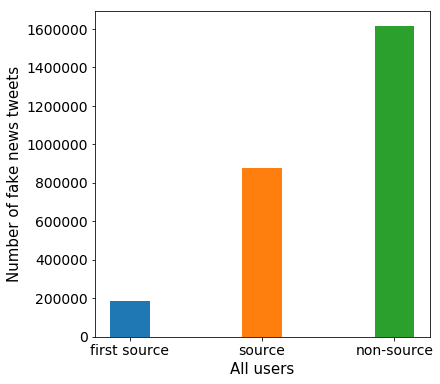

In [82]:
label = ["first source", "source", "non-source"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)

plt.bar(1, len(tweets_csv[tweets_csv["is_first"]==1]), width=0.3)
plt.bar(2, len(tweets_csv[tweets_csv["is_source"]==1]), width=0.3)
plt.bar(3, len(tweets_csv[tweets_csv["is_source"]==0]), width=0.3)

plt.xticks([1, 2, 3], label)
plt.xlabel('All users', fontsize=15)
plt.ylabel('Number of fake news tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig("fig/N-of-all-users.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

In [3]:
source_tweets = tweets_csv[tweets_csv["is_source"]==1]
"曾经为source的用户量", len(source_tweets["user_id"].unique())

('曾经为source的用户量', 84370)

### 分析fake news的source_content

In [14]:
import SQLite_handler
import importlib
importlib.reload(SQLite_handler)
    
tweet_ids = source_tweets["tweet_id"].tolist()
rsts = SQLite_handler.find_source(tweet_ids)

In [19]:
count = [r["source_content"] for r in rsts if r["source_content"] != -1]
_sum = len(count)
print("amount of tweets of which source can be found:", _sum)
count = Counter(count)

for k, v in count.most_common(20):
    print(k, '- {:.2%}'.format(v / _sum))

amount of tweets of which source can be found: 876655
Twitter Web Client - 33.36%
dlvr.it - 22.55%
Twitter for iPhone - 7.94%
Facebook - 7.71%
Twitter for Android - 5.80%
Twitter for iPad - 3.15%
Put your button on any page!  - 2.81%
Mobile Web - 2.48%
twitterfeed - 2.23%
IFTTT - 1.62%
Hootsuite - 1.04%
SocialOomph - 0.88%
Sprout Social - 0.86%
Linkis.com - 0.84%
Buffer - 0.64%
WordPress.com - 0.47%
Rignite - 0.41%
OS X - 0.32%
TweetDeck - 0.32%
Mobile Web (M5) - 0.26%


In [86]:
first_tweets = tweets_csv[tweets_csv["is_first"]==1]
"曾经为first source的用户量", len(first_tweets["user_id"].unique())

('曾经为first source的用户量', 24446)

In [31]:
ira_tweets = tweets_csv[tweets_csv["is_IRA"]==1]
'IRA用户量', len(ira_tweets["user_id"].unique())

('IRA用户量', 92)

说明并没有匿名用户存在，非常好

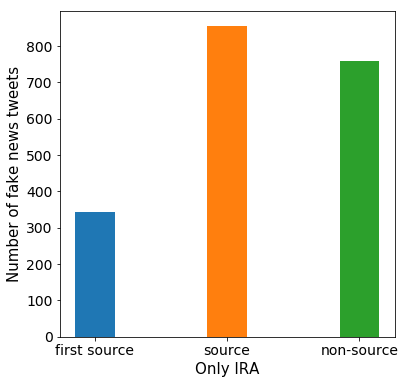

In [93]:
label = ["first source", "source", "non-source"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)
plt.bar(1, len(ira_tweets[ira_tweets["is_first"]==1]), width=0.3)
plt.bar(2, len(ira_tweets[ira_tweets["is_source"]==1]), width=0.3)
plt.bar(3, len(ira_tweets[ira_tweets["is_source"]==0]), width=0.3)

# label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 2, 3], label)
plt.xlabel('Only IRA', fontsize=15)
plt.ylabel('Number of fake news tweets', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.savefig("fig/N-of-only-IRA.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

## The influence of IRAs in fake news spreading

### IRA涉及了哪些URL

In [94]:
ira_url = set(ira_tweets["URL"])
ira_first_url = set(ira_tweets[ira_tweets["is_first"]==1]["URL"])
ira_source_url = set(ira_tweets[ira_tweets["is_source"]==1]["URL"])
non_source_url = set(ira_tweets[ira_tweets["is_source"]==0]["URL"])

len(ira_url), len(ira_first_url), len(ira_source_url), len(non_source_url)

(1274, 344, 696, 600)

### IRA涉及的URL影响了多少其他人？

In [95]:
from tqdm import tqdm

cnt = 0
cnt_first = 0
cnt_source = 0
cnt_non = 0
for i, row in tqdm(tweets_csv.iterrows()):
    if row["URL"] in ira_url:
        cnt += 1
    if row["URL"] in ira_first_url:
        cnt_first += 1
    if row["URL"] in ira_source_url:
        cnt_source += 1
    if row["URL"] in non_source_url:
        cnt_non += 1
cnt, cnt_first, cnt_source, cnt_non

2492013it [02:15, 18381.03it/s]


(263591, 599, 74070, 202404)

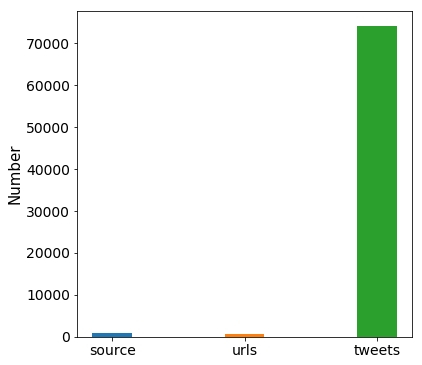

In [97]:
label = ["source", "urls", "tweets"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)

plt.bar(1, len(ira_tweets[ira_tweets["is_source"]==1]), width=0.3)
plt.bar(2, len(ira_source_url), width=0.3)
plt.bar(3, cnt_source, width=0.3)

# label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 2, 3], label)
# plt.xlabel('All users', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
# plt.yscale("log")
plt.savefig("fig/ira-source.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

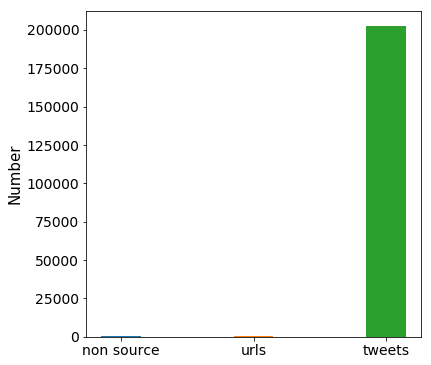

In [98]:
label = ["non source", "urls", "tweets"]
plt.figure(figsize=(6, 6))

# plt.subplot(131)

plt.bar(1, len(ira_tweets[ira_tweets["is_source"]==0]), width=0.3)
plt.bar(2, len(non_source_url), width=0.3)
plt.bar(3, cnt_non, width=0.3)

# label = ["pro-hillary\n{0:.0%}".format(count[0] / (count[0]+count[1])), "pro-trump\n{0:.0%}".format(count[1] / (count[0]+count[1]))]
plt.xticks([1, 2, 3], label)
# plt.xlabel('All users', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
# plt.yscale("log")
plt.savefig("fig/ira-source.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.tight_layout()
plt.close()

In [99]:
len(tweets_csv) / len(tweets_csv["URL"].unique())

13.521723088275989

In [100]:
len(ira_tweets[ira_tweets["is_source"]==1]) / len(ira_source_url)

1.228448275862069

In [101]:
cnt_non / len(non_source_url)

337.34

## IRA的被转发情况

In [102]:
all_tweets = pd.read_csv("data/ira_tweets_csv_hashed.csv", 
                         usecols=["tweetid", "userid", "retweet_count"])

In [104]:
ira_id = set(ira_tweets[ira_tweets["is_source"] == 1]["tweet_id"])
df = all_tweets.loc[all_tweets['tweetid'].isin(ira_id)]
df.describe()

,tweetid,retweet_count
count,8.550000e+02,855.000000
mean,7.816363e+17,9.987135
std,1.369839e+16,44.360178
min,7.345768e+17,0.000000
25%,7.769366e+17,0.000000
50%,7.818376e+17,0.000000
75%,7.942575e+17,1.000000
max,7.961374e+17,640.000000


# 用户分析 （Group）

In [20]:
user_count = pd.value_counts(tweets_csv["user_id"]).rename("is_fake")
user_count.head(25)
# type(user_count)

4855687055            8738
4831603043            7334
3374126201            4844
2242085304            4732
122455671             3738
758652815996776448    2956
4906718786            2908
2462473820            2879
750517084166193156    2766
382921457             2707
751963872899305472    2703
1075296265            2605
60893069              2594
759317433345769472    2491
825501626             2476
763982421297553408    2405
707278892801765377    2376
2700350600            2338
746875038901633024    2324
766499969696169984    2321
755614943039352832    2189
3274720530            2169
4857584175            2158
763518863212511232    2136
765648314159210496    2112
Name: is_fake, dtype: int64

## TOP sources

In [21]:
user_sources_count = tweets_csv["is_source"].groupby(tweets_csv["user_id"]).sum().sort_values(ascending=False)
user_sources_count.head(25)

user_id
4855687055            8610
4831603043            7332
3374126201            4844
2242085304            4732
122455671             3738
758652815996776448    2955
2462473820            2878
4906718786            2827
750517084166193156    2766
382921457             2706
751963872899305472    2702
1075296265            2605
60893069              2520
759317433345769472    2486
825501626             2460
763982421297553408    2405
707278892801765377    2376
2700350600            2338
746875038901633024    2324
766499969696169984    2321
755614943039352832    2189
4857584175            2158
763518863212511232    2136
3274720530            2128
765648314159210496    2112
Name: is_source, dtype: int64

In [22]:
user_sources_count["4855687055"]

8610

In [50]:
for uid in user_sources_count.head(25).index:
    try:
        print(uid, winners.index(uid) + 1)
    except:
        print(uid, -1)

4855687055 -1
4831603043 -1
3374126201 -1
2242085304 -1
122455671 -1
758652815996776448 -1
2462473820 -1
4906718786 -1
750517084166193156 -1
382921457 -1
751963872899305472 -1
1075296265 -1
60893069 -1
759317433345769472 -1
825501626 -1
763982421297553408 -1
707278892801765377 -1
2700350600 -1
746875038901633024 -1
766499969696169984 -1
755614943039352832 -1
4857584175 -1
763518863212511232 -1
3274720530 -1
765648314159210496 -1


## TOP first sources

In [23]:
user_first_count = tweets_csv["is_first"].groupby(tweets_csv["user_id"]).sum().sort_values(ascending=False)
user_first_count.head(25)

user_id
122455671             3701
4831603043            2481
60893069              2079
4496549793            1814
825501626             1689
3274720530            1683
3374126201            1565
14210021              1451
137637040             1102
18856867              1085
18208120              1028
138092553              916
634330366              881
112732163              851
359122436              781
1494835716             775
166721424              763
1246177122             759
2270900414             744
3326947147             733
2507996790             708
386235552              682
750517084166193156     679
4578277935             674
466090255              674
Name: is_first, dtype: int64

In [52]:
for uid in user_first_count.head(25).index:
    try:
        print(uid, winners.index(uid) + 1)
    except:
        print(uid, -1)

122455671 -1
4831603043 -1
60893069 -1
4496549793 -1
825501626 -1
3274720530 -1
3374126201 -1
14210021 -1
137637040 -1
18856867 -1
18208120 -1
138092553 -1
634330366 -1
112732163 -1
359122436 -1
1494835716 -1
166721424 -1
1246177122 -1
2270900414 -1
3326947147 -1
2507996790 -1
386235552 -1
750517084166193156 -1
4578277935 -1
466090255 -1


In [33]:
users = pd.concat([user_count, user_first_count, user_sources_count], axis=1, sort=False)
users["source_rate"] = users["is_source"] / users["is_fake"]
users["first_rate"] = users["is_first"] / users["is_fake"]
users["first_source_rate"] = users["is_first"] / users["is_source"]
users = users.fillna(0)
users.head()

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate
4855687055,8738,327,8610,0.985351,0.037423,0.037979
4831603043,7334,2481,7332,0.999727,0.338287,0.338380
3374126201,4844,1565,4844,1.000000,0.323080,0.323080
2242085304,4732,183,4732,1.000000,0.038673,0.038673
122455671,3738,3701,3738,1.000000,0.990102,0.990102


## 根据Get_User爬虫获取的信息进一步补充users数据项

In [35]:
user_info = pd.DataFrame([json.loads(line.strip()) for line in open("data/fake-users-info.json")])
user_info = user_info.rename(columns={'id_str': 'user_id'})
user_info = user_info.set_index("user_id")

tmp = pd.concat([users, user_info], axis=1, join="inner")
tmp["message"].fillna("User going well.", inplace=True)

In [30]:
tmp.to_csv("data/fake_users.csv")

# 全面分析涉及到的用户特征

In [36]:
users = tmp
# users = pd.read_csv("data/fake_users.csv")

In [45]:
# 用户已经被注销的那些tweets

tweets_csv[tweets_csv["user_id"].isin(users[users["message"]!="User going well."].index)]["tweet_id"].to_csv("data/tweets_id_user_not_found.csv")

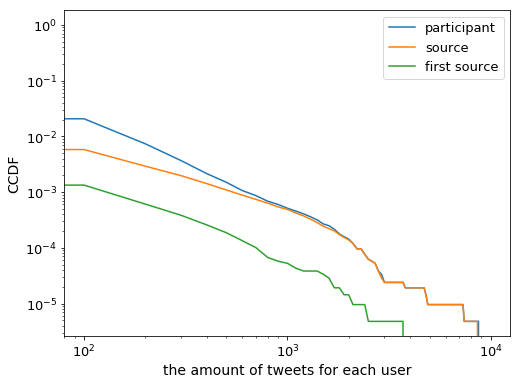

In [303]:
def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(users["is_fake"], 0, 10000, 100)
plt.plot(x, cdf, label="participant")
x, cdf, pdf = get_cdf_pdf(users["is_source"], 0, 10000, 100)
plt.plot(x, cdf, label="source")
x, cdf, pdf = get_cdf_pdf(users["is_first"], 0, 10000, 100)
plt.plot(x, cdf, label="first source")
# plt.title('Distribution of size of fake news ', fontsize=15)
plt.ylabel('CCDF', fontsize=14)
plt.xlabel('the amount of tweets for each user', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.yscale("log")
plt.xscale("log")
plt.legend(fontsize=13)
plt.savefig('fig/distribution_starters.pdf', dpi=300)
plt.show()
plt.close()

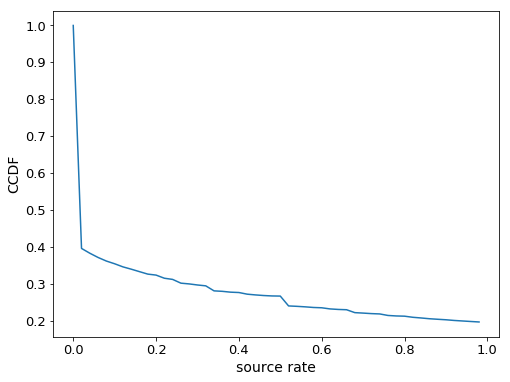

In [294]:
plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(users["source_rate"], 0, 1, 0.02)
plt.plot(x, cdf)
plt.ylabel('CCDF', fontsize=14)
plt.xlabel('source rate', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
# plt.yscale("log"); plt.xscale("log")
plt.savefig('fig/distribution_starters.pdf', dpi=300)
plt.show()
plt.close()

## 用户分类source top500与其他用户

为了研究source users的特点，需要进行对比，目前用户都是跟fake news有关（至少发布一条），选择其他剩余的全部用户作为对比组

In [99]:
top_users = users.sort_values("is_source", ascending=False).head(500)
top_users.to_csv("data/top500-fake-source-users.csv") # save top 500
other_users = users.sort_values("is_source", ascending=False).iloc[500:]

In [101]:
users["is_source_top"] = (users["is_fake"] >= 242)

## 0. 多少用户被suspened，或not found 

In [123]:
prop_df = (users["message"]
           .groupby(users["is_source_top"])
           .value_counts(normalize=True)
           .rename("Prop")
           .reset_index())

In [124]:
prop_df

,is_source_top,message,Prop
0,False,User going well.,0.827816
1,False,User has been suspended.,0.093130
2,False,User not found.,0.079055
3,True,User going well.,0.720036
4,True,User has been suspended.,0.238819
5,True,User not found.,0.041145


In [129]:
users["message"].value_counts()

User going well.            172369
User has been suspended.     19568
User not found.              16430
Name: message, dtype: int64

User going well.            0.827238
User has been suspended.    0.093911
User not found.             0.078851
Name: message, dtype: float64


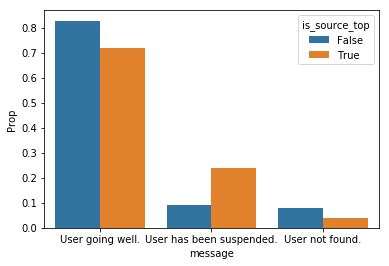

In [125]:
# cnt_not_found = len(users[users["code"]==50]) # 50 not found
# cnt_suspened = len(users[users["code"]==63]) # 63 suspened
# cnt_exists = len(users) - cnt_not_found - cnt_suspened

# height = [cnt_exists, cnt_suspened, cnt_not_found]
# bars = ('exists', 'suspened', 'not found')
# y_pos = np.arange(len(bars))
# plt.xticks(y_pos, bars)
# plt.bar(y_pos, height)

sns.barplot(x="message", y="Prop", data=prop_df, hue="is_source_top")
# users["message"].fillna("User going well.", inplace=True)
print(users["message"].value_counts(normalize=True))

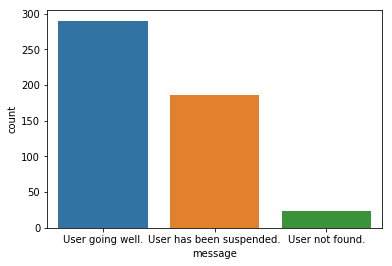

In [130]:
sns.countplot(x="message", data=top_users)

### 检查为什么会存在not found 

<span style="color:red">*已经用账号testkaykaykay进行测试，发现是自己主动deactive the account*</span>

所以suspened和not found的用户在传播过程中是非常重要的，我们不能放过对他们的研究。

In [248]:
uids_not_found = users[users["code"]==50].index

In [255]:
uids_not_found

Index(['137637040', '2711204024', '501567221', '2330112218', '356324005',
       '753082489711816704', '4856642956', '292586544', '4895096885',
       '105604742',
       ...
       '90271735', '734874821759229952', '3053971999', '371334115',
       '154234924', '136617688', '896136019', '2744985801', '307481163',
       '700050080'],
      dtype='object', length=16430)

In [254]:
importlib.reload(SQLite_handler)

<module 'SQLite_handler' from '/home/alex/kayzhou/election/SQLite_handler.py'>

In [256]:
users_data_not_found = SQLite_handler.find_users(uids_not_found)

In [275]:
c = 0
for u in users_data_not_found:
    if "error" in u:
        print(u)
        c += 1
c

{'user_id': '612933174', 'error': 'not found'}
{'user_id': '274551374', 'error': 'not found'}
{'user_id': '3271339802', 'error': 'not found'}
{'user_id': '757449025243131904', 'error': 'not found'}
{'user_id': '706122184985600000', 'error': 'not found'}
{'user_id': '2928819864', 'error': 'not found'}
{'user_id': '4418720713', 'error': 'not found'}
{'user_id': '2201548476', 'error': 'not found'}
{'user_id': '78047698', 'error': 'not found'}


9

In [258]:
users_data_not_found_large = SQLite_handler.find_users_from_large(uids_not_found)

In [273]:
c = 0
for u in users_data_not_found_large:
    if "error" in u:
        c += 1
c

2974

有2974在users.db中没有找到，其中9个用户在alex.db没有找到，可能是IRA

## 1. 地区及语言

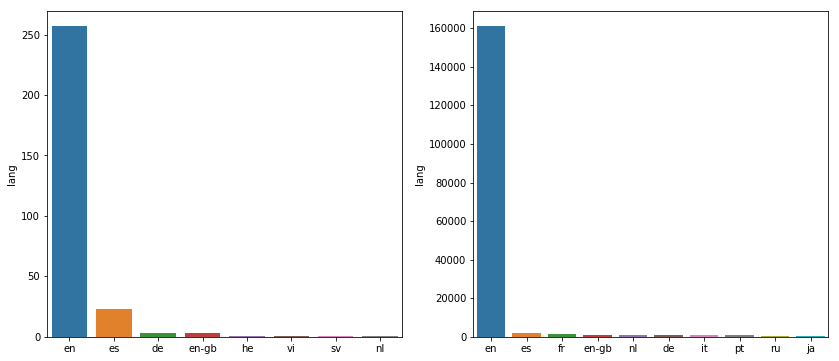

In [138]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
x = top_users.lang.value_counts()[:10]
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.lang.value_counts()[:10]
sns.barplot(x=x.index, y=x)

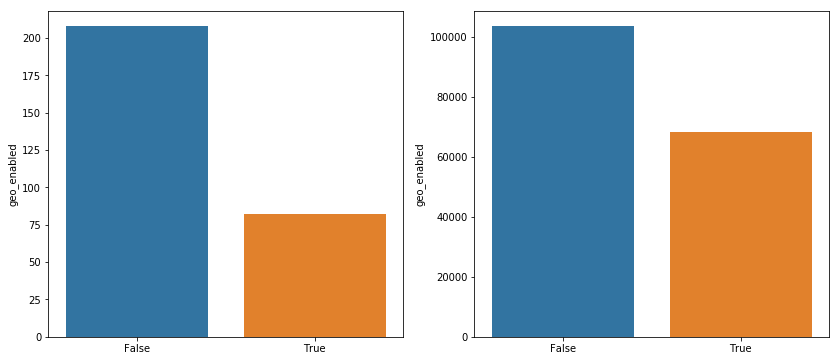

In [142]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
x = top_users.geo_enabled.value_counts()
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.geo_enabled.value_counts()
sns.barplot(x=x.index, y=x)

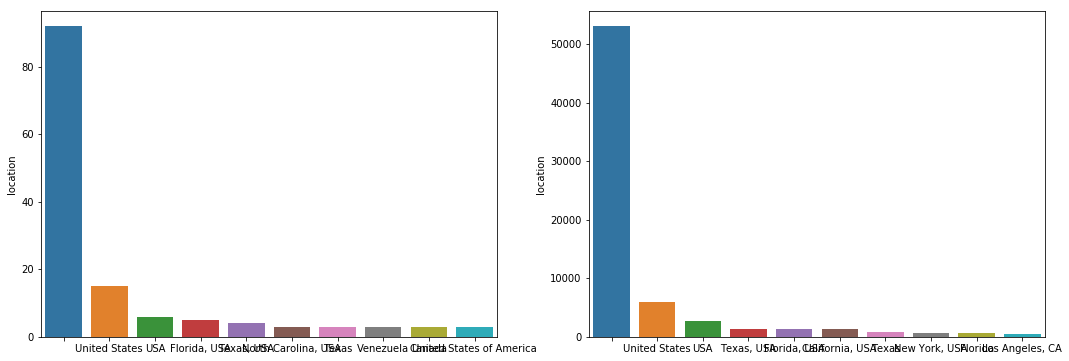

In [146]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
x = top_users.location.value_counts()[:10]
# print(top_users.location.value_counts())
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.location.value_counts()[:10]
# print(other_users.location.value_counts())
sns.barplot(x=x.index, y=x)

# 2. 是否为验证用户 

False    288
True       2
Name: verified, dtype: int64
False    171331
True        748
Name: verified, dtype: int64


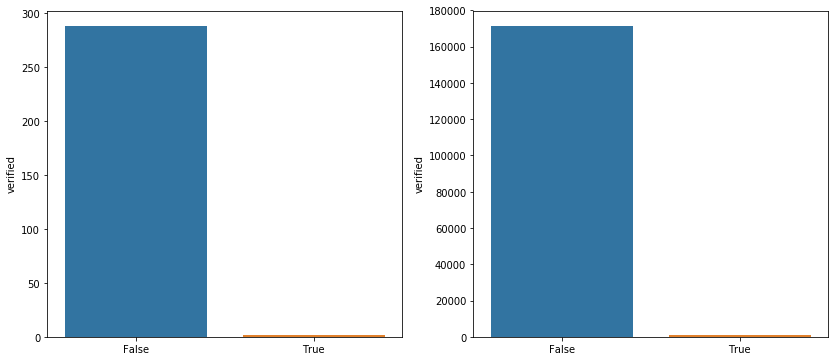

In [148]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
x = top_users.verified.value_counts()
print(x)
sns.barplot(x=x.index, y=x)
plt.subplot(122)
x = other_users.verified.value_counts()
print(x)
sns.barplot(x=x.index, y=x)

In [310]:
top_users = users.sort_values("is_source", ascending=False).head(500)
top_users.to_csv("data/top-fake-source-users.csv") # save top 500

# 3. fake news指标上的数值

In [307]:
top_users.describe()

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate,code,favourites_count,followers_count,friends_count,id,listed_count,statuses_count,time_zone,utc_offset
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,210.000000,290.000000,290.000000,290.000000,5.000000e+02,290.000000,2.900000e+02,0.0,0.0
mean,762.926000,169.300000,735.654000,0.960769,0.236179,0.243625,61.452381,19108.682759,19948.996552,10876.831034,2.382561e+17,273.306897,1.508388e+05,NaN,NaN
std,774.666688,317.297238,770.916332,0.096048,0.296095,0.300387,4.220039,39534.300396,70624.566055,29152.609896,3.526803e+17,1075.046048,1.835696e+05,NaN,NaN
min,242.000000,0.000000,242.000000,0.158537,0.000000,0.000000,50.000000,0.000000,22.000000,0.000000,1.267113e+07,0.000000,0.000000e+00,NaN,NaN
25%,352.750000,18.000000,326.500000,0.974556,0.031736,0.035021,63.000000,24.500000,853.000000,550.250000,1.978720e+08,30.250000,4.066850e+04,NaN,NaN
50%,495.500000,60.000000,463.000000,1.000000,0.101484,0.105237,63.000000,1546.000000,4226.000000,2961.000000,2.222342e+09,97.500000,9.859950e+04,NaN,NaN
75%,868.750000,189.250000,832.250000,1.000000,0.308026,0.319565,63.000000,21422.500000,14281.500000,9325.000000,7.512894e+17,232.500000,1.787560e+05,NaN,NaN
max,8738.000000,3701.000000,8610.000000,1.000000,1.000000,1.000000,63.000000,443492.000000,929739.000000,367616.000000,7.909311e+17,16015.000000,1.045437e+06,NaN,NaN


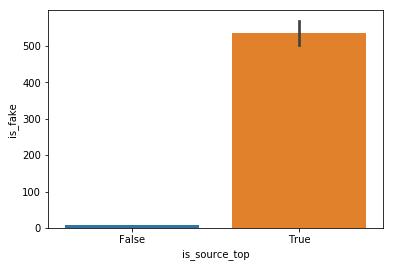

In [153]:
sns.barplot(x="is_source_top", y="is_fake", data=users, estimator=np.mean)

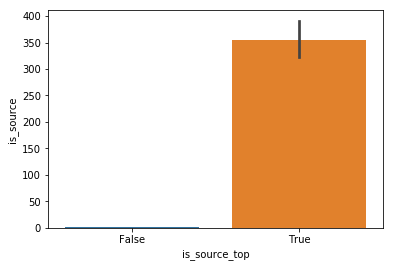

In [154]:
sns.barplot(x="is_source_top", y="is_source", data=users, estimator=np.mean)

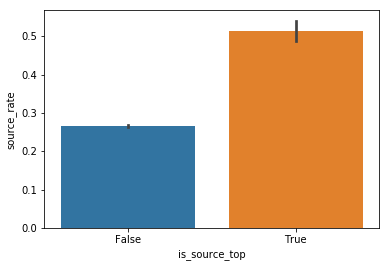

In [163]:
sns.barplot(x="is_source_top", y="source_rate", data=users, estimator=np.mean)

# 4. 基本统计数据上的数值

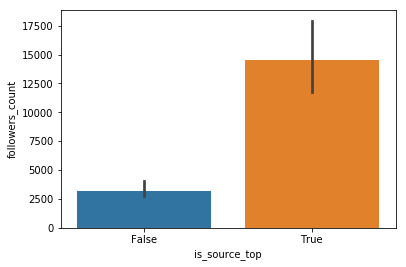

In [156]:
sns.barplot(x="is_source_top", y="followers_count", data=users, estimator=np.mean)

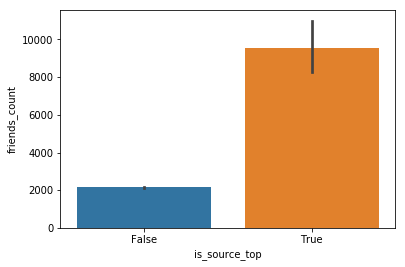

In [158]:
sns.barplot(x="is_source_top", y="friends_count", data=users, estimator=np.mean)

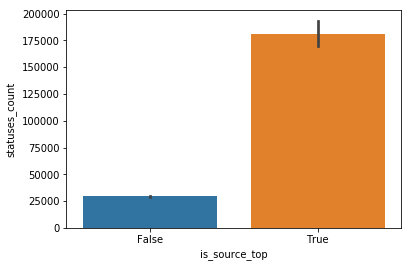

In [159]:
sns.barplot(x="is_source_top", y="statuses_count", data=users, estimator=np.mean)

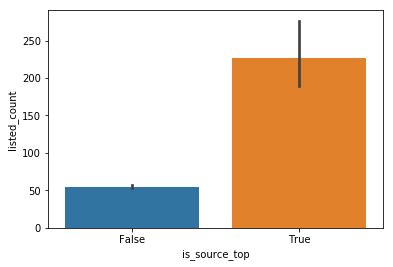

In [160]:
sns.barplot(x="is_source_top", y="listed_count", data=users, estimator=np.mean)

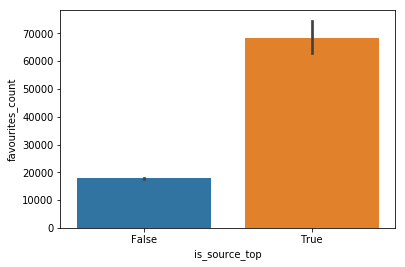

In [162]:
sns.barplot(x="is_source_top", y="favourites_count", data=users, estimator=np.mean)

# 5. CI与source的关系

In [22]:
f_labels = ["FAKE", "BIAS", "LEFT", "LEFTCENTER", "CENTER", "RIGHTCENTER", "RIGHT"]

In [23]:
node_map = json.load(open("disk/node_map.json"))

FAKE ...
BIAS ...
LEFT ...
LEFTCENTER ...
CENTER ...
RIGHTCENTER ...
RIGHT ...


{'FAKE': 346,
 'BIAS': 349,
 'LEFT': 248,
 'LEFTCENTER': 162,
 'CENTER': 159,
 'RIGHTCENTER': 151,
 'RIGHT': 241}

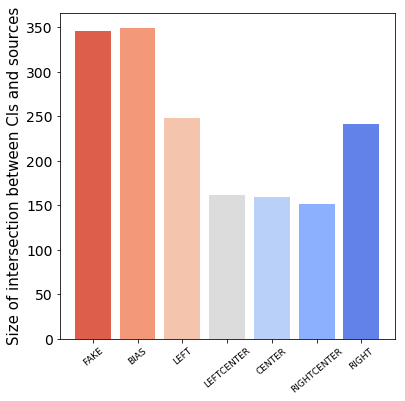

In [189]:
pea_source_cnt_CI_rank = {}
spe_source_cnt_CI_rank = {}
pea_source_cnt_CI_value = {}
spe_source_cnt_CI_value = {}

pea_first_cnt_CI_rank = {}
spe_first_cnt_CI_rank = {}
pea_first_cnt_CI_value = {}
spe_first_cnt_CI_value = {}

top_num = 1000

len_intersection = {}

for label in f_labels:
    print(label, "...")
    CI_rst = np.load("data/CI_rst/CI_out_{}.npy".format(label))
    CI_rank_rst = CI_rst[0][:top_num]
    # print(CI_rank_rst)
    CI_values_rst = CI_rst[1]
    
    CI_index = []
    CI_rank_values = []
    CI_values = []

    users = pd.read_csv("data/users_{}.csv".format(label), dtype=str, nrows=top_num)
    users = users.astype({"cnt": int, "source_cnt": int, "first_cnt": int, 
                          "source_rate": float, "first_rate": float, "first_source_rate": float})
    users = users.set_index("user_id")
    # print(users)
    
    set_CI_users = set(CI_rank_rst)
    set_source_users = set()
    
    for user_id, row in users.iterrows():
        node_id = node_map[user_id]
        set_source_users.add(node_id)
        try:
            i = CI_rank_rst.index(node_id)
            rank = top_num - i
        except ValueError as e:
            rank = 0

        val = CI_values_rst[node_id]
        # print("->", user_id, rank, val)
        CI_index.append(user_id)
        CI_rank_values.append(rank)
        CI_values.append(val)

    len_intersection[label] = len(set_CI_users & set_source_users)
        
    CI_rank = pd.Series(CI_rank_values, index=CI_index)
    CI_values = pd.Series(CI_values, index=CI_index)
    users["CI_rank"] = pd.Series(CI_rank)
    users["CI_values"] = pd.Series(CI_values)
    
    source_CI = pd.DataFrame({
                              "CI_rank": users["CI_rank"],
                              "CI_values": users["CI_values"],
                              "cnt": users["cnt"],
                              "source_cnt": users["source_cnt"],
                              "first_cnt": users["first_cnt"],
                              "source_rate": users["source_rate"]}
                            )
    
#     print("pearson ~")
    cor = source_CI.corr(method="pearson")
#     display(cor)
    pea_source_cnt_CI_rank[label] = cor.source_cnt["CI_rank"]
    pea_source_cnt_CI_value[label] = cor.source_cnt["CI_values"]
    
#     print("spearman ~")
    cor = source_CI.corr(method="spearman")
#     display(cor)
    spe_source_cnt_CI_rank[label] = cor.source_cnt["CI_rank"]
    spe_source_cnt_CI_value[label] = cor.source_cnt["CI_values"]
    
#     print("pearson ~")
    cor = source_CI.corr(method="pearson")
#     display(cor)
    pea_first_cnt_CI_rank[label] = cor.first_cnt["CI_rank"]
    pea_first_cnt_CI_value[label] = cor.first_cnt["CI_values"]
    
#     print("spearman ~")
    cor = source_CI.corr(method="spearman")
#     display(cor)
    spe_first_cnt_CI_rank[label] = cor.first_cnt["CI_rank"]
    spe_first_cnt_CI_value[label] = cor.first_cnt["CI_values"]
    
def plot_corr(cor):
    display(cor)
    plt.figure(figsize=(6, 6))
    x = range(len(f_labels))
    for i in x:
        plt.bar(i, cor[f_labels[i]], color=sns.color_palette("coolwarm", 7)[6-i])
    plt.xticks(x, f_labels)
#     plt.xlabel('Only IRA', fontsize=15)
    plt.ylabel('Size of intersection between CIs and sources', fontsize=15)
    plt.xticks(fontsize=9, rotation=40); plt.yticks(fontsize=14)
    plt.savefig("fig/size-of-intersection500.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()
    
# plot_corr(pea_source_cnt_CI_rank)
# plot_corr(spe_source_cnt_CI_rank)
# plot_corr(pea_source_cnt_CI_value)
# plot_corr(spe_source_cnt_CI_value)

plot_corr(len_intersection)

# # plot_corr(pea_source_cnt_CI_rank)
# plot_corr(spe_first_cnt_CI_rank)
# # plot_corr(pea_source_cnt_CI_value)
# plot_corr(spe_first_cnt_CI_value)


/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


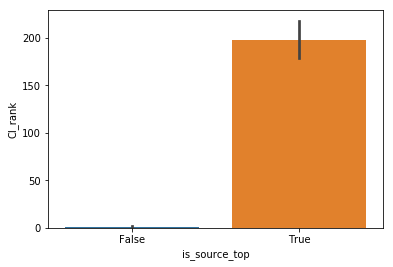

In [300]:
sns.barplot(x="is_source_top", y="CI_rank", data=users, estimator=np.mean)

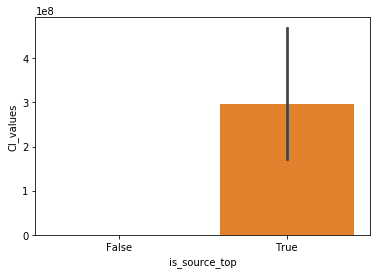

In [301]:
sns.barplot(x="is_source_top", y="CI_values", data=users, estimator=np.mean)

In [302]:
source_CI = pd.DataFrame({"CI_rank": users["CI_rank"],
                          "CI_values": users["CI_values"],
                          "is_source": users["is_source"],
                          "source_rate": users["source_rate"]})

In [303]:
source_CI.corr()

,CI_rank,CI_values,is_source,source_rate
CI_rank,1.000000,0.257452,0.488942,0.082084
CI_values,0.257452,1.000000,0.328691,0.016954
is_source,0.488942,0.328691,1.000000,0.109910
source_rate,0.082084,0.016954,0.109910,1.000000


In [304]:
# 顺便这里把IRA做一下

ira_users = users.loc[ira_tweets["user_id"].unique()]

In [305]:
ira_users[ira_users["CI_rank"] > 0]

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate,code,contributors_enabled,created_at,default_profile,...,statuses_count,time_zone,translator_type,url,utc_offset,verified,withheld_in_countries,is_source_top,CI_rank,CI_values
4437444442,5,0,5,1.000000,0.000000,0.000000,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,305,3486230
4272870988,23,3,22,0.956522,0.130435,0.136364,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,606,19000410
4224729994,18,9,17,0.944444,0.500000,0.529412,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,717,45916704
4289431230,5,0,5,1.000000,0.000000,0.000000,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,342,4104793
4355797094,6,1,6,1.000000,0.166667,0.166667,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,320,3662592
789266125485998080,223,29,223,1.000000,0.130045,0.130045,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,92,1299480
4311371968,11,2,10,0.909091,0.181818,0.200000,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,385,5149200


In [291]:
ira_users.describe()

,is_fake,is_first,is_source,source_rate,first_rate,first_source_rate,code,favourites_count,followers_count,friends_count,id,listed_count,statuses_count,time_zone,utc_offset,CI_rank,CI_values
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,0.0,0.0,0.0,9.200000e+01,0.0,0.0,0.0,0.0,92.00000,9.200000e+01
mean,17.706522,3.739130,9.336957,0.537902,0.174323,inf,63.0,NaN,NaN,NaN,4.026391e+16,NaN,NaN,NaN,NaN,15.50000,2.367963e+06
std,40.342092,8.527743,26.549261,0.369736,0.242284,NaN,0.0,NaN,NaN,NaN,1.690001e+17,NaN,NaN,NaN,NaN,84.76775,1.469957e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.0,NaN,NaN,NaN,1.513801e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
25%,1.000000,0.000000,1.000000,0.279720,0.000000,0.000000,63.0,NaN,NaN,NaN,1.671006e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
50%,4.000000,1.000000,2.000000,0.500000,0.102302,0.183333,63.0,NaN,NaN,NaN,2.492015e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
75%,15.500000,2.250000,7.000000,1.000000,0.254332,0.582543,63.0,NaN,NaN,NaN,2.932521e+09,NaN,NaN,NaN,NaN,0.00000,0.000000e+00
max,228.000000,54.000000,223.000000,1.000000,1.000000,inf,63.0,NaN,NaN,NaN,7.892661e+17,NaN,NaN,NaN,NaN,620.00000,1.295445e+08


In [293]:
## 明天把数据都补充上！这下就更牛逼了！

___
# Analysis of results of all_tweets.py

In [118]:
from all_tweets import ALL_TWEET

Lebron = ALL_TWEET()
Lebron.load_all_tweets()
all_tweets = Lebron.tweets_csv

In [6]:
all_tweets.head()

,URL,dt,hostname,is_IRA,is_first,is_source,media_type,retweeted_id,tweet_id,user_id
0,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:49:57,newsweek.com,0,1,1,5,-1,785628468746727424,215207998
1,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:09,newsweek.com,0,0,0,5,785628468746727424,785628515991302144,20634939
2,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:10,newsweek.com,0,0,0,5,785628468746727424,785628519703326722,26378513
3,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:16,newsweek.com,0,0,0,5,785628468746727424,785628546114859008,445966346
4,http://www.newsweek.com/vladimir-putin-sidney-...,2016-10-10 18:50:23,newsweek.com,0,0,0,5,785628468746727424,785628574388621312,754104364164345860


In [99]:
map_labels = {
    "0": "fake",
    "1": "extreme bias (right)",
    "2": "right",
    "3": "right leaning",
    "4": "center",
    "5": "left leaning",
    "6": "left",
    "7": "extreme bias (left)"
}

0.24808157536856099

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

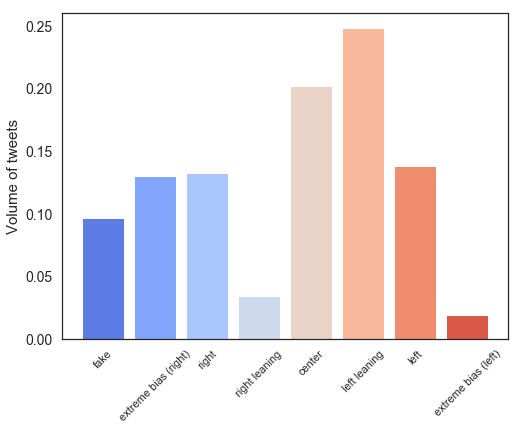

In [119]:
sns.set_style("white")
sns.set_palette("coolwarm", n_colors=8)

media_type_counts = all_tweets["media_type"].value_counts(normalize=True)
display(media_type_counts)
plt.figure(figsize=(8, 6))
x = range(len(media_type_counts))

for i in x:
    plt.bar(i, media_type_counts[str(i)])
    
plt.xticks(x, [map_labels[k] for i, k in enumerate(map_labels)])
# plt.xlabel("IRAs", fontsize=18)
plt.ylabel('Volume of tweets', fontsize=15)
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=14)

# plt.savefig("fig/size-of-intersection500.pdf", dpi=300, bbox_inches='tight')

In [82]:
IRA_tweets = all_tweets[all_tweets["is_IRA"]>0]

## Making all-users.csv ... ...

Already coded in the all_tweets.py

In [43]:
def load_all_users():
    users = pd.read_csv("data/all-users.csv", index_col="user_id", dtype={"user_id": str})

    # change the type
    f_labels = [map_labels[k] for k in map_labels]
    users = users.astype({"is_IRA": int})

    for label in f_labels:
        users = users.astype({label: int, label + "_source": int, label + "_first": int, 
                              label + "_source_rate": float, label + "_first_rate": float,
                              label + "_first_source_rate": float,})
    return users

In [44]:
all_users = load_all_users()

In [305]:
# user_id > name

user_info = pd.DataFrame([json.loads(line.strip()) for line in open("data/user-top-info.json")])
user_info = user_info.rename(columns={'id_str': 'user_id'})
user_info = user_info.set_index("user_id")
map_user_name = []
for line in open("data/user-top-info.json"):
    d = json.loads(line.strip())
    try:
        dat = {"user_id": d["id_str"], "name": d["name"]}
    except:
        dat = {"user_id": d["id_str"], "name": d["message"]}
    map_user_name.append(dat)
    
map_user_name = pd.DataFrame(map_user_name).set_index("user_id")

In [307]:
# Show the top sources !!!

for label in f_labels:
    print(label)
    tmp = users.sort_values(label + "_source", ascending=False).head(25)
    tmp = tmp.join(map_user_name)
#     display(tmp)
#     display(tmp[[label + "_source", "name"]].sort_values(label + "_source", ascending=False))
    

FAKE
BIAS
LEFT
LEFTCENTER
CENTER
RIGHTCENTER
RIGHT


In [84]:
IRA_users = all_users[all_users.is_IRA > 0]

## Are IRAs the sources of fake news or influencers? 

In [85]:
len(IRA_tweets)

7343

In [86]:
IRA_users = all_users[all_users.is_IRA > 0]
len(IRA_users)

266

In [87]:
other_users = all_users[all_users.is_IRA == 0]

0 1205
1 1559
2 1261
3 222
4 1670
5 1014
6 736
7 96
0 3310765
1 4459311
2 4548188
3 1166656
4 6937087
5 8514719
6 4737539
7 644314


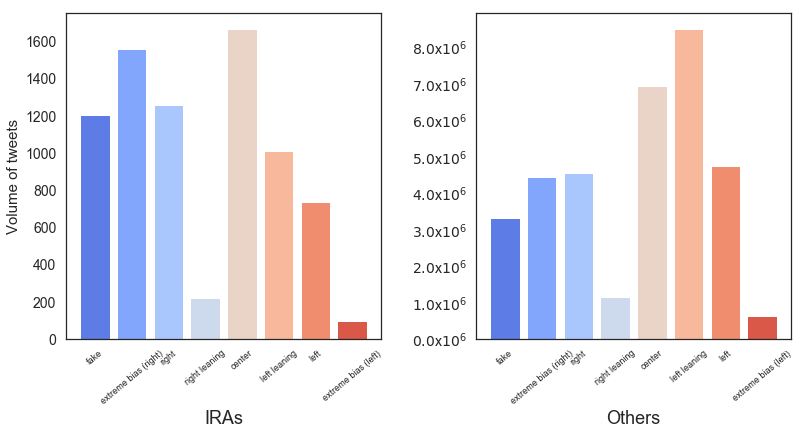

In [122]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 6))
plt.subplots_adjust(wspace = 0.3)
ax = plt.subplot(121)
x = range(len(media_type_counts))

for i in x:
#     d = IRA_users[map_labels[str(i)]].sum()
    print(i, IRA_users[map_labels[str(i)]].sum())
    plt.bar(i, IRA_users[map_labels[str(i)]].sum())

plt.xticks(x, [map_labels[k] for i, k in enumerate(map_labels)])
plt.xlabel("IRAs", fontsize=18)
plt.ylabel('Volume of tweets', fontsize=15)
plt.xticks(fontsize=9, rotation=40)
plt.yticks(fontsize=14)
# plt.savefig("fig/size-of-intersection500.pdf", dpi=300, bbox_inches='tight')

ax = plt.subplot(122)
x = range(len(media_type_counts))

for i in x:
    print(i, other_users[map_labels[str(i)]].sum())
    plt.bar(i, other_users[map_labels[str(i)]].sum())
    
plt.xticks(x, [map_labels[k] for i, k in enumerate(map_labels)])
plt.xlabel("Others", fontsize=18)
# plt.ylabel('Source rate of tweets of all users', fontsize=15)
plt.xticks(fontsize=9, rotation=40)
plt.yticks(fontsize=14)

def formatnum(x, pos):
    return '$%.1f$x$10^{6}$' % (x/1000000)
formatter = FuncFormatter(formatnum)
ax.yaxis.set_major_formatter(formatter)

plt.show()
plt.tight_layout()
plt.savefig("fig/IRA Volume.pdf", dpi=300, bbox_inches='tight')
plt.close()

## 用户角度 

making the big table!!

In [223]:
def get_big_table(_users):
    big_table = []

    for i in range(len(map_labels)):
        lab = map_labels[str(i)]
        volume = _users[lab].sum()
        source_volume = _users[lab + "_source"].sum()
        first_volume = _users[lab + "_first"].sum()
        source_rate = _users[lab + "_source_rate"].mean()
        first_rate = _users[lab + "_first_rate"].mean()
        user_volume = len(_users[_users[lab]>0])
        source_user_volume = len(_users[_users[lab + "_source"]>0])
        d = dict(Nt=volume, Ns=source_volume, Nu=user_volume,
                 Rs=source_rate, Rf=first_rate, Nsu=source_user_volume, Nf=first_volume)
        big_table.append(d)

    big_table = pd.DataFrame(big_table, index=[map_labels[k] for k in map_labels])
    big_table["Pt"] = big_table["Nt"] / big_table["Nt"].sum()
    big_table["Ps"] = big_table["Ns"] / big_table["Ns"].sum()
    big_table["Ns/Nt"] = big_table["Ns"] / big_table["Nt"]
    big_table["Nf/Nt"] = big_table["Nf"] / big_table["Nt"]
    big_table["Nt/Nu"] = big_table["Nt"] / big_table["Nu"]
    big_table["Ns/Nsu"] = big_table["Ns"] / big_table["Nsu"]

#     big_table = big_table[["Nt", "Pt", "Ns", "Ps", "Rs", "Rf", "Nu", "Nt/Nu", "Nsu", "Ns/Nsu"]]
    big_table = big_table[["Nt", "Pt", "Ns", "Ps", "Ns/Nt", "Nu", "Rs", "Rf", "Nt/Nu"]]
    return big_table

In [224]:
BT = get_big_table(IRA_users)
BT.to_csv("data/IRA_BT.csv", float_format="%.2f")
BT

,Nt,Pt,Ns,Ps,Ns/Nt,Nu,Rs,Rf,Nt/Nu
fake,1205,0.155223,812,0.176829,0.673859,72,0.167821,0.041604,16.736111
extreme bias (right),1559,0.200824,836,0.182056,0.536241,97,0.227434,0.064942,16.072165
right,1261,0.162437,735,0.160061,0.582871,104,0.222762,0.110206,12.125000
right leaning,222,0.028597,57,0.012413,0.256757,83,0.090226,0.022807,2.674699
center,1670,0.215123,1039,0.226263,0.622156,169,0.387689,0.121281,9.881657
left leaning,1014,0.130620,624,0.135889,0.615385,174,0.308952,0.135664,5.827586
left,736,0.094809,414,0.090157,0.562500,151,0.341215,0.131751,4.874172
extreme bias (left),96,0.012366,75,0.016333,0.781250,42,0.126296,0.040202,2.285714


In [225]:
BT2 = get_big_table(all_users)
BT2.to_csv("data/all_BT.csv", float_format="%.2f")
BT2

,Nt,Pt,Ns,Ps,Ns/Nt,Nu,Rs,Rf,Nt/Nu
fake,3311970,0.096485,1153890,0.106602,0.348400,214311,0.020878,0.003456,15.454036
extreme bias (right),4460870,0.129955,1288969,0.119081,0.288950,309700,0.030080,0.006603,14.403842
right,4549449,0.132535,1260015,0.116406,0.276960,446376,0.045069,0.008286,10.191966
right leaning,1166878,0.033994,396059,0.036590,0.339418,303664,0.031991,0.008192,3.842662
center,6938757,0.202141,2251102,0.207967,0.324424,1116957,0.102675,0.017665,6.212197
left leaning,8515733,0.248082,2588508,0.239138,0.303968,1383945,0.138740,0.031969,6.153231
left,4738275,0.138036,1700382,0.157089,0.358861,713021,0.081746,0.015179,6.645351
extreme bias (left),644410,0.018773,185402,0.017128,0.287708,103725,0.012434,0.001223,6.212678


In [226]:
def plot_compare(col_name):
    plt.figure(figsize=(13, 6))
    ax1 = plt.subplot(121)
    plt.ylabel(col_name, fontsize=15)
    plt.xlabel("IRAs", fontsize=15)
    BT[col_name].plot.bar()
    ax2 = plt.subplot(122)
    BT2[col_name].plot.bar()
    plt.xlabel("All users", fontsize=15)
    if col_name == "Ns/Nt":
        ax1.set_ylim((0, 0.8))
        ax2.set_ylim((0, 0.8))
    if col_name == "Rs":
        ax1.set_ylim((0, 0.4))
        ax2.set_ylim((0, 0.4))
    if col_name == "Rf":
        ax1.set_ylim((0, 0.2))
        ax2.set_ylim((0, 0.2))
        
    plt.show()
    plt.close()

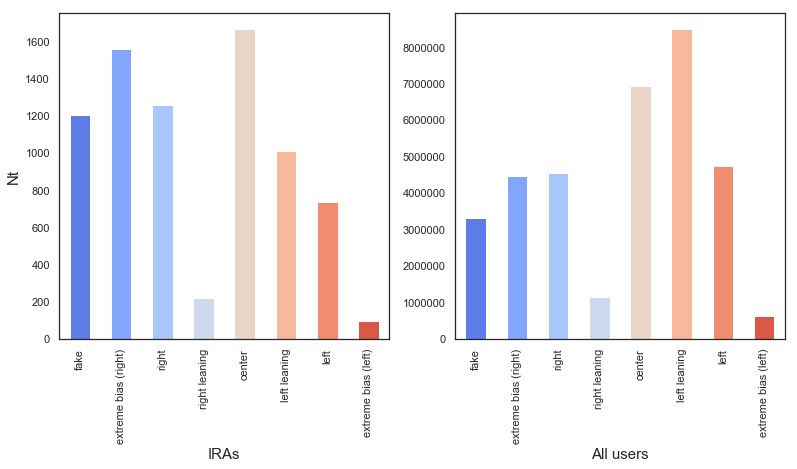

In [227]:
plot_compare("Nt")

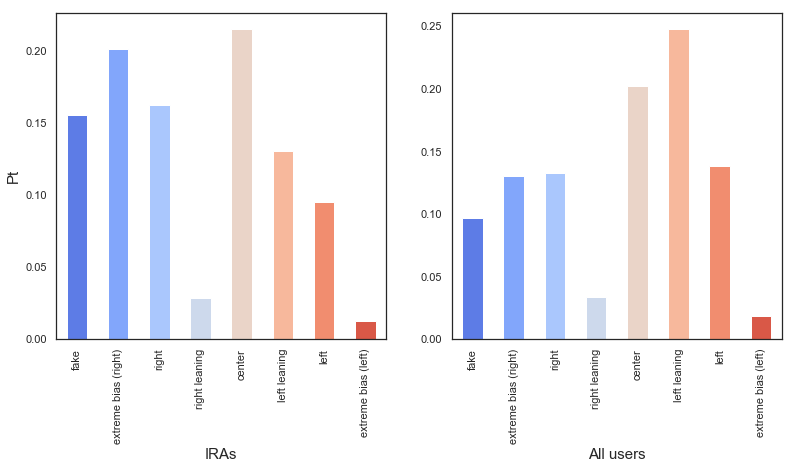

In [228]:
plot_compare("Pt")

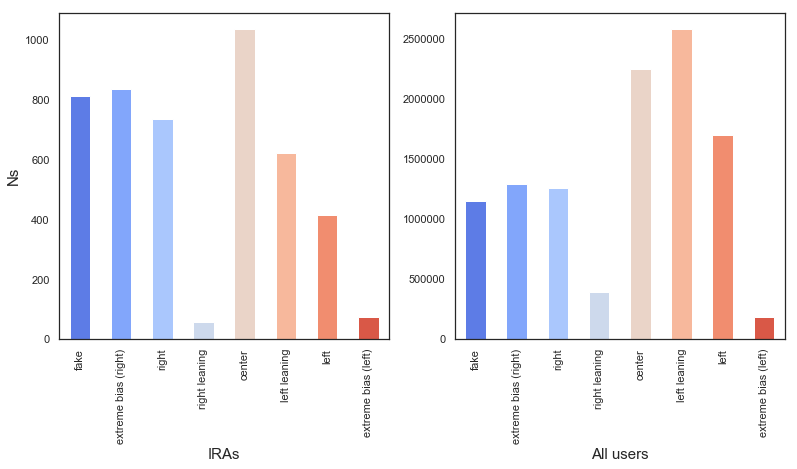

In [229]:
plot_compare("Ns")

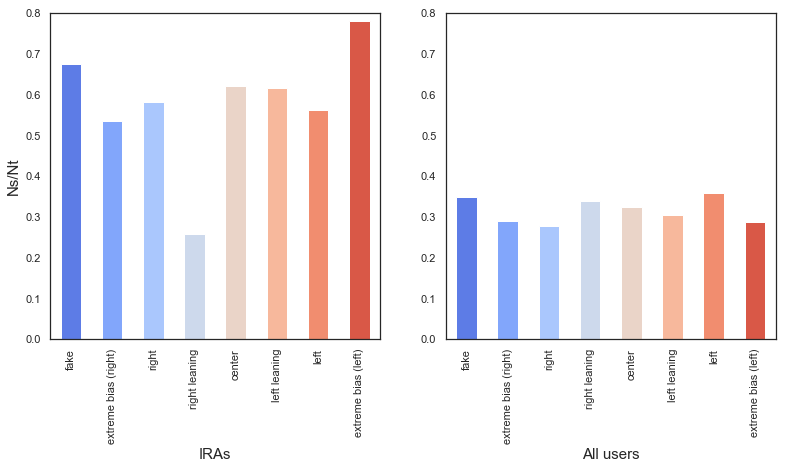

In [230]:
plot_compare("Ns/Nt")

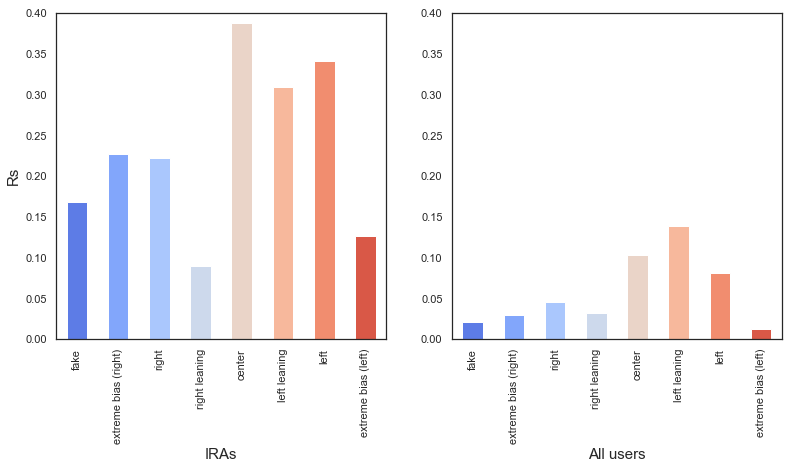

In [231]:
plot_compare("Rs")

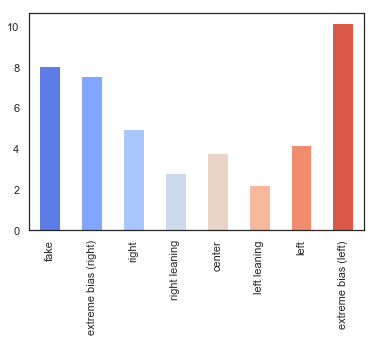

In [235]:
(BT["Rs"] / BT2["Rs"]).plot.bar()

检查为什么extreme bias会这么奇怪？

In [290]:
%time entire_IRA_tweets = pd.read_csv("data/ira-tweets-ele.csv", dtype=str)

CPU times: user 5.72 s, sys: 212 ms, total: 5.94 s
Wall time: 6.3 s


In [291]:
entire_IRA_tweets

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,740415585280872448,3749844202,Вестник Волгограда,NovostiVolga,"Волгоград, Россия",Традиции. История. Наследие. #Волгоград #Стали...,https://t.co/CSP9JHi5vU,47296,728,2015-09-23,...,NaN,NaN,0.0,0.0,1.0,3.0,"[волгоград, сталинград]",[],NaN,NaN
1,760739675464146944,723434980177633280,Erdollum,erdollum,NaN,"Keiner kann uns verbieten, uns so zu äußern, w...",NaN,7691,3492,2016-04-22,...,NaN,NaN,0.0,2.0,6.0,3.0,"[Bergfest, Flixbus, Draxler, ErdoganTyrann, sm...",[],NaN,NaN
2,769537391669481473,723434980177633280,Erdollum,erdollum,NaN,"Keiner kann uns verbieten, uns so zu äußern, w...",NaN,7691,3492,2016-04-22,...,NaN,NaN,1.0,1.0,15.0,8.0,"[bvbm05, SGES04, KOED98]",[],NaN,NaN
3,772720681012297728,723434980177633280,Erdollum,erdollum,NaN,"Keiner kann uns verbieten, uns so zu äußern, w...",NaN,7691,3492,2016-04-22,...,NaN,NaN,2.0,2.0,2.0,3.0,"[Merkel, AfD, CDU, mondaymotivation, MeckPom]",[http://goo.gl/y05Ist],NaN,NaN
4,773187767643803648,723434980177633280,Erdollum,erdollum,NaN,"Keiner kann uns verbieten, uns so zu äußern, w...",NaN,7691,3492,2016-04-22,...,NaN,NaN,0.0,0.0,9.0,5.0,"[Lammert, Merkel, ltwmv, MeckPom, AfD, Flüchtl...",[http://goo.gl/OUAowD],NaN,NaN
5,755427531914940420,723434980177633280,Erdollum,erdollum,NaN,"Keiner kann uns verbieten, uns so zu äußern, w...",NaN,7691,3492,2016-04-22,...,NaN,NaN,0.0,0.0,4.0,2.0,[ISbekenntsich],[],NaN,NaN
6,756021477930110976,723434980177633280,Erdollum,erdollum,NaN,"Keiner kann uns verbieten, uns so zu äußern, w...",NaN,7691,3492,2016-04-22,...,NaN,NaN,0.0,0.0,10.0,2.0,"[Morgen, Hitze, Gewitter, Cruz, LouisOnAGT, Co...",[],NaN,NaN
7,784084336307863552,8e58ab0f46d273103d9e71aa92cdaffb6e330ec7d15ae5...,8e58ab0f46d273103d9e71aa92cdaffb6e330ec7d15ae5...,8e58ab0f46d273103d9e71aa92cdaffb6e330ec7d15ae5...,NaN,"In bad luck, hold out; in good luck, hold in. ...",NaN,881,834,2013-09-16,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://dlvr.it/MPd4zk],"[2683299690, 69231187]",NaN
8,750647492400807936,2573933721,Вестник Н.Новгорода,NovostiNN,"Nizhniy Novgorod, Russia",Высокие мысли и воздух святой #НижнийНовгород ...,https://t.co/sIJZDK1hTI,58060,456,2014-05-31,...,NaN,NaN,0.0,0.0,8.0,7.0,[НижнийНовгород],[],NaN,NaN
9,748448356297498626,3978316814,BlackMatters,blackmattersus,NaN,Fast-growing black community. Latest news and ...,https://t.co/oBiVuggezq,20019,14112,2015-10-22,...,NaN,NaN,0.0,0.0,23.0,24.0,[],[https://twitter.com/ReparationsAct/status/748...,NaN,NaN


In [262]:
extre_left_tweets = [str(s) for s in list(IRA_tweets[IRA_tweets.media_type=="7"].tweet_id)]

In [263]:
len(extre_left_tweets)

96

In [258]:
extre_left_tweets = IRA_tweets[IRA_tweets["tweet_id"].isin(extre_left_tweets)]

In [283]:
extre_left_tweets = entire_IRA_tweets[entire_IRA_tweets["tweetid"].isin(IRA_tweets.tweet_id)]

In [278]:
print(entire_IRA_tweets[entire_IRA_tweets["tweetid"]=="784120884948852736"].retweet_tweetid)

3493474    784119098837839872
Name: retweet_tweetid, dtype: object


In [292]:
entire_IRA_tweets.retweet_userid.dropna()

7                 2683299690
10                 333787548
11                1700401698
17                2258774085
18        772732656937238528
19                  18340526
21        744677161961922561
22                 213219891
23                  42617240
25                 199770246
26                2695810070
28                2316246829
29                4646833108
30        770866246900412416
31                3824403809
32                 285328319
33                2669657311
34                 347145522
35                 292174359
37                  21609208
38                  15513604
39                 335029843
41        717627639159128064
42                  25073877
44                3060388144
48                 494076761
49                 123528753
55                1434170370
60                2577412818
61                 113454997
                 ...        
672624            3050064371
672625            2916017550
672627              19293713
672628    6953

检查出现问题，大量都是转发，为什么统计的时候不一致呢？

In [277]:
entire_IRA_tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

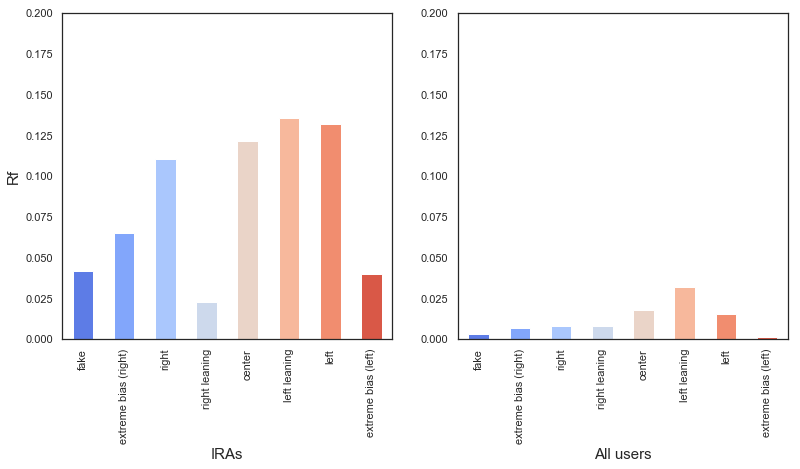

In [232]:
plot_compare("Rf")

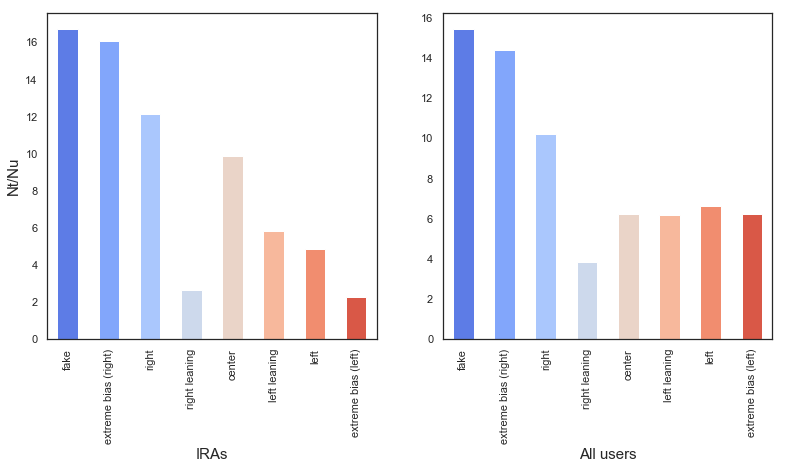

In [233]:
plot_compare("Nt/Nu")

In [200]:
top_num = 1000

len_intersection = {}

for label in f_labels:
    print(label, "...")
    CI_rst = np.load("data/CI_rst/CI_out_{}.npy".format(label))
    CI_rank_rst = CI_rst[0][:top_num]
    # print(CI_rank_rst)
    CI_values_rst = CI_rst[1]
    
    set_CI_users = set(CI_rank_rst)
    set_source_users = set()
    
    for user_id, row in IRA_users.iterrows():
        node_id = node_map[user_id]
        set_source_users.add(node_id)
        try:
            i = CI_rank_rst.index(node_id)
            print(i)
            rank = top_num - i
        except ValueError as e:
            rank = 0

    len_intersection[label] = len(set_CI_users & set_source_users)

    
def plot_corr(cor):
    display(cor)
    plt.figure(figsize=(6, 6))
    x = range(len(f_labels))
    for i in x:
        plt.bar(i, cor[f_labels[i]], color=sns.color_palette("coolwarm", 7)[6-i])
    plt.xticks(x, f_labels)
#     plt.xlabel('Only IRA', fontsize=15)
    plt.ylabel('Size of intersection between 1000 top CIs and IRAs', fontsize=15)
    plt.xticks(fontsize=9, rotation=40); plt.yticks(fontsize=14)
    plt.savefig("fig/size-of-intersection500.pdf", dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()
    
plot_corr(len_intersection)

NameError: name 'f_labels' is not defined

In [98]:
from SQLite_handler import find_users

find_users([56257941])

[{'user_id': 56257941,
  'first_location': None,
  'first_tweet_time_EST': '2016-10-14 19:36:41',
  'latest_tweet_time_EST': '2016-11-03 09:47:28',
  'num_tweet': 8}]

## Are IRAs the sources of fake news or influencers? 